In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('malaria_clinical_data.csv')

In [35]:
df.shape

(2207, 34)

In [36]:
df.head(n=5)


,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [37]:
df.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [39]:
#we are only interested in columns 16 to the end
subset = df.iloc[:,16:]

In [40]:
subset.shape

(2207, 18)

In [41]:
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [42]:
#handling missing values
#drop all rows with missing values

subset.dropna(inplace=True)

In [43]:
subset.shape

(2156, 18)

In [44]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [45]:
#get different malaria outcomes.
#outcomes serve as labels/classes in the data

In [46]:
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [47]:
#preferred approach
labels= pd.Categorical(subset['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [48]:
subset.head(n=5)

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [49]:
#class distribution
subset['Clinical_Diagnosis'].value_counts()

Clinical_Diagnosis
Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: count, dtype: int64

<Axes: xlabel='Clinical_Diagnosis'>

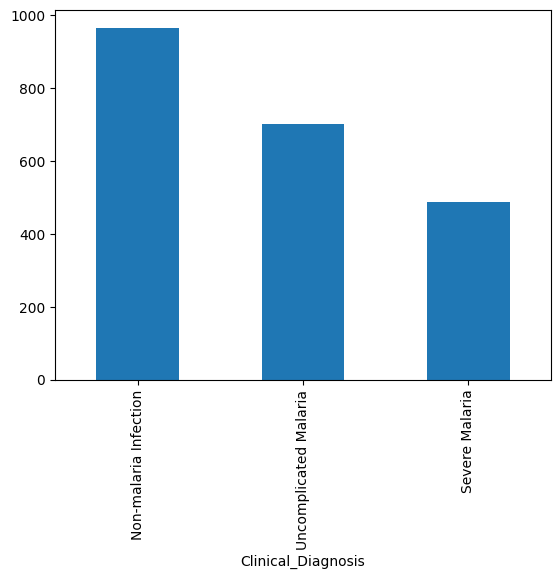

In [50]:
#plot a bar chart to display class distribution
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [51]:
#desciptive statistics on the data
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


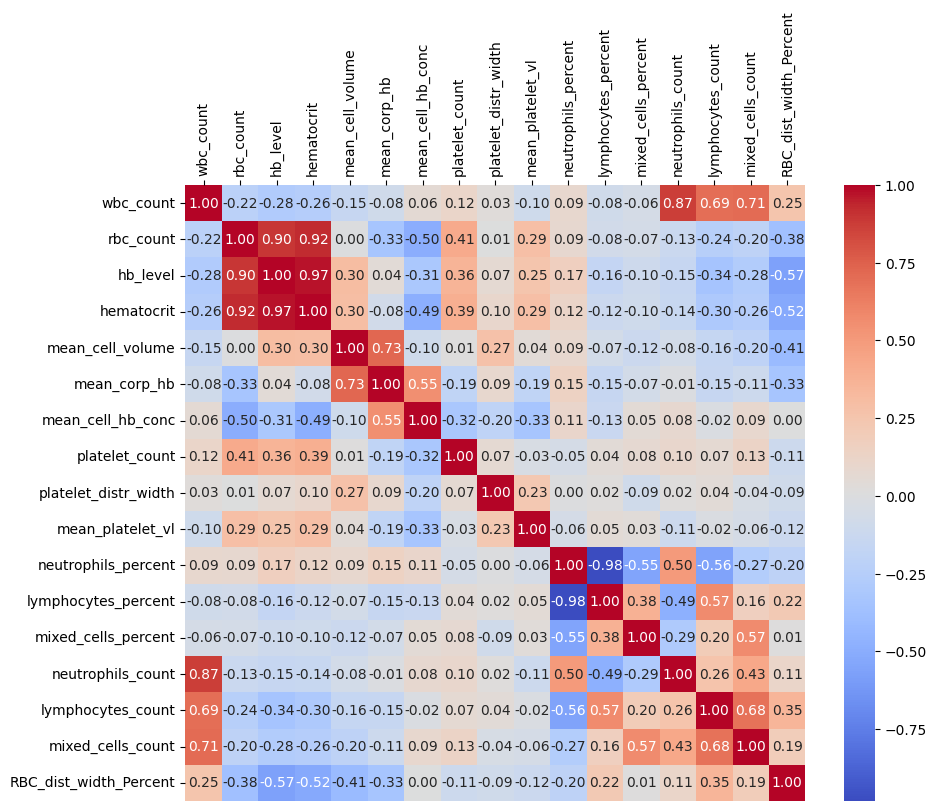

In [52]:
#check feature correlation
subset = df.iloc[:, 16:]  # Adjust range as needed
corr_matrix = subset.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar_kws={"orientation": "vertical"}
)
plt.gca().xaxis.tick_top()
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Data Preprocessing


In [53]:
#separate labels/classes from features/measurement 
x=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [54]:
x.shape

(2207, 17)

In [55]:
y.shape

(2207,)

In [56]:
#encode the labels
#this is required by scikit learn when performing SL

In [57]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [58]:
y_encoded[0:5]

array([1, 1, 1, 1, 1])

In [59]:
y[0:5]

0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [60]:
classes = label_encoder.classes_
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

split data into train-test set


In [61]:
#train:test ratio = 80:20


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size=0.2)

In [63]:
x_train.shape

(1765, 17)

In [64]:
x_test.shape

(442, 17)

In [65]:
y_test.shape

(442,)

Standardization of data

In [66]:
# scale data between 0 and 1

In [67]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
x_train_scaled = min_max_scaler.fit_transform(x_train)
x_test_scaled = min_max_scaler.fit_transform(x_test)

Training phase

In [68]:
#create random forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train_scaled, y_train)

RandomForestClassifier()

Testing Phase


In [70]:
#model prediction on the test set

In [71]:
y_pred=clf.predict(x_test_scaled)

In [72]:
y_pred[0:3]

array([0, 0, 1])

In [73]:
y_test[0:3]

array([0, 0, 1])

In [74]:
classes


array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

Evaluate the model 

  the following metrics will be used to evaluate the model:
   accuracy
   f1 score
   recall
   precision
   confusion matrix

In [75]:
#import the metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [76]:
#balanced accuracy score
balanced_accuracy= balanced_accuracy_score(y_test, y_pred)
balanced_accuracy=round(balanced_accuracy, 2)
print('balanced accuracy :', balanced_accuracy)

balanced accuracy : 0.7


In [77]:
#f1_score
f1score=f1_score(y_test, y_pred, average='weighted') #the use of weighted average use is beause the data is imbalanced
f1score=round(f1score, 2)
print('f1 score:',f1score)

f1 score: 0.71


In [78]:
#precison score
precision=precision_score(y_test, y_pred, average='weighted')
precision=round(precision, 2)
print('precision score:', precision)

precision score: 0.72


In [79]:
#recall
recall = recall_score(y_test, y_pred, average='weighted')
recall = round(recall, 2)
print('recall score:', recall)

recall score: 0.72


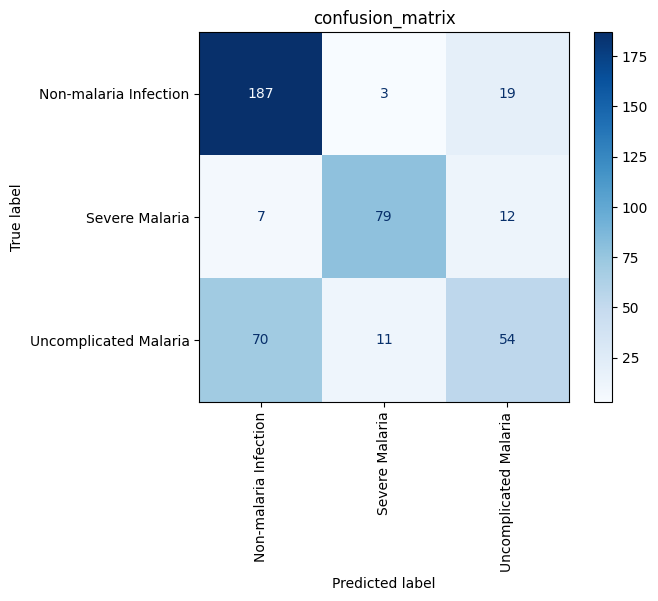

In [80]:
#confusion matrix
disp= ConfusionMatrixDisplay.from_estimator(clf, x_test_scaled, y_test, xticks_rotation ='vertical', cmap=plt.cm.Blues, display_labels=classes)
plt.title('confusion_matrix')
plt.show()